# Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

In [2]:
def relu(x):
    return np.maximum(x,0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0, keepdims=True)

def relu_prime(x):
    return np.array(x > 0, dtype=np.float64)

In [3]:
def initialize_parameters(NN_Struct):
    parameters = {}
    for i in range(1, len(NN_Struct)):
        parameters[f"W{i}"] = np.random.randn(NN_Struct[i], NN_Struct[i-1]) * 0.01
        parameters[f"b{i}"] = np.random.randn(NN_Struct[i], 1)

    return parameters

def forward_propagation(x, parameters):
    cache = {
        "A0" : x
    }

    for i in range(1, len(parameters)//2 + 1):
        W, B = parameters[f"W{i}"], parameters[f"b{i}"]
        z = np.dot(W, cache[f"A{i-1}"]) + B
        a = relu(z) if i < len(parameters) // 2 else softmax(z)
        cache[f"Z{i}"] = z
        cache[f"A{i}"] = a
    
    return cache, a

def backward_propagation(y, parameters, forward_caches):
    m = y.shape[1]
    gradients = {}
    AL = forward_caches[f'A{len(parameters) // 2}']
    dAL = - (np.divide(y, AL) - np.divide(1 - y, 1 - AL))

    dZ_out = AL - y
    dW_out = (1/m) * np.dot(dZ_out, forward_caches[f'A{len(parameters) // 2 - 1}'].T)
    db_out = (1/m) * np.sum(dZ_out, axis=1, keepdims=True)

    gradients[f'dW{len(parameters) // 2}'] = dW_out
    gradients[f'db{len(parameters) // 2}'] = db_out

    dAL = np.dot(parameters[f'W{len(parameters) // 2}'].T, dZ_out)

    for i in range(len(parameters) // 2 - 1, 0, -1):
        Z, A_prev = forward_caches[f'Z{i}'], forward_caches[f'A{i-1}']
        W = parameters[f'W{i}']

        dZ = np.multiply(dAL, relu_prime(Z))
        dW = np.dot(dZ, A_prev.T) / m
        db = np.sum(dZ, axis=1, keepdims=True) / m
        dA_prev = np.dot(W.T, dZ)

        gradients[f'dW{i}'] = dW
        gradients[f'db{i}'] = db
        dAL = dA_prev

    return gradients

def update_parameters(parameters, grads, alpha):
    for i in range(1,len(parameters)//2 + 1):
        parameters[f"W{i}"] -= alpha * grads[f"dW{i}"]
        parameters[f"b{i}"] -= alpha * grads[f"db{i}"]

    return parameters

def model(x, y, NN_Struct, alpha, epochs):
    parameters = initialize_parameters(NN_Struct)
    cost_list = []
    for i in range(epochs):
        
        cache, al = forward_propagation(x, parameters)
        
        cost = -(1/x.shape[0])*np.sum(y*np.log(al))

        grads = backward_propagation(y, parameters, cache)

        parameters = update_parameters(parameters, grads, alpha)

        if(i%(epochs/10) == 0):
            print(f"Cost after {i} iterations is : {cost:.3f}")

        cost_list.append(cost)

    return parameters, cost_list

In [4]:
def zscore_normal(x):
        mu = np.mean(x,axis=0)
        sigma = np.std(x,axis=0)
        x_norm = (x-mu)/sigma

        return (x_norm)
        
def mean_normal(x):
        mu = np.mean(x,axis=0)
        x_norm = (x-mu)/(np.max(x)-np.min(x))
                
        return (x_norm)

def plot_cost(Cost_list, iterations):
    t = np.arange(0, iterations)
    plt.plot(t, Cost_list)
    plt.show

In [5]:
file_path = 'Classification_train.csv'
df = pd.read_csv(file_path, dtype='float64')

y = df.iloc[:, 0].values
x = df.iloc[:, 1:].values

x_train = x[0:24000]
y_train = y[0:24000].reshape(-1,)

x_train = x_train.T

y_train = np.array(y_train,dtype=int)

In [6]:
print("Shape of training set input: ", x_train.shape)
print("Shape of training set output: ", y_train.shape)

Shape of training set input:  (784, 24000)
Shape of training set output:  (24000,)


In [7]:
targets = np.zeros((len(y_train), 10), np.float32)
targets[range(targets.shape[0]),y_train] = 1
y_train = targets.T

In [8]:
print("Shape of training set output after one-hot encoding: ", y_train.shape)

Shape of training set output after one-hot encoding:  (10, 24000)


In [9]:
iterations = 1000
nn_struct = [784, 1250, 10]
alpha =    0.0009
parameters, cost_list = model(x_train, y_train, nn_struct, alpha = alpha, epochs = iterations)

Cost after 0 iterations is : 203.396
Cost after 100 iterations is : 4.274
Cost after 200 iterations is : 2.655
Cost after 300 iterations is : 1.906
Cost after 400 iterations is : 1.463
Cost after 500 iterations is : 1.173
Cost after 600 iterations is : 0.970
Cost after 700 iterations is : 0.820
Cost after 800 iterations is : 0.705
Cost after 900 iterations is : 0.614


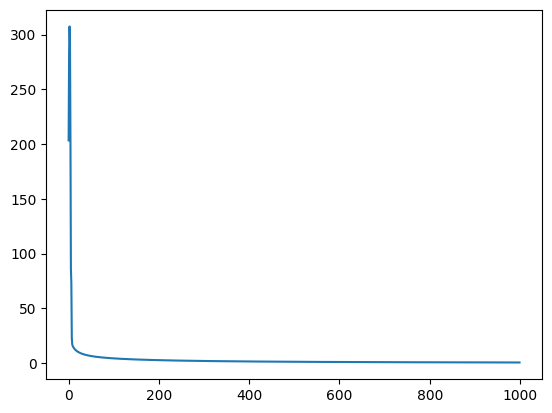

In [10]:
plot_cost(cost_list, iterations)

In [11]:
def accuracy(x, y, params):
    forward_cache, a= forward_propagation(x, params)
    a_out = forward_cache[f'A{len(parameters)//2}']

    a_out = np.argmax(a_out, 0)

    y = np.argmax(y, 0)

    accuracy = np.mean(a_out == y)*100

    return accuracy

In [12]:
print("Accuracy for training set:", accuracy(x_train, y_train, parameters))

Accuracy for training set: 99.79583333333333


In [13]:
x_cv = x[24000:]
y_cv = y[24000:].reshape(-1,)

x_cv = x_cv.T

y_cv = np.array(y_cv,dtype=int)

In [14]:
print("Shape of cross-validation set input: ", x_cv.shape)
print("Shape of cross-validation set output: ", y_cv.shape)

Shape of cross-validation set input:  (784, 6000)
Shape of cross-validation set output:  (6000,)


In [15]:
targets = np.zeros((len(y_cv), 10), np.float32)
targets[range(targets.shape[0]),y_cv] = 1
y_cv = targets.T

In [16]:
print("Shape of cross-validation set output after one-hot encoding: ", y_cv.shape)

Shape of cross-validation set output after one-hot encoding:  (10, 6000)


In [17]:
print("Accuracy for cross-validation set:", accuracy(x_cv, y_cv, parameters))

Accuracy for cross-validation set: 97.41666666666666


In [75]:
weights = {}
biases = {}

for key, value in parameters.items():
    if 'W' in key:
        weights[key] = value
    elif 'b' in key:
        biases[key] = value

# Example usage
print("Weights found by the neural network:")
for key, value in weights.items():
    print(f"{key}: {value}")

print("\nBiases found by the neural network:")
for key, value in biases.items():
    print(f"{key}: {value}")

Weights found by the neural network:
W1: [[ 0.00281898 -0.02033489  0.00251649 ... -0.01717311  0.00743202
   0.01794157]
 [ 0.00236116  0.01362758 -0.01081318 ... -0.00908103  0.01364841
  -0.01063471]
 [-0.01520896 -0.00234642 -0.00085542 ...  0.00308498 -0.00523781
   0.01980752]
 ...
 [-0.00029338 -0.01068149  0.00540498 ... -0.01108231 -0.01459598
   0.0175874 ]
 [-0.00576676  0.01699039  0.00099527 ...  0.0042988  -0.00091859
   0.00688586]
 [ 0.01125714  0.00209128  0.01219397 ...  0.0119482  -0.00500544
   0.00868683]]
W2: [[ 0.0082059   0.01341136  0.0164317  ...  0.00709984  0.00691888
  -0.01487628]
 [ 0.00707496  0.01177356  0.00345031 ... -0.00132263 -0.0017518
   0.00055222]
 [ 0.00640744 -0.00339825  0.0080201  ...  0.00622594  0.00711969
  -0.00629503]
 ...
 [-0.01050665  0.01310802  0.01646812 ... -0.00952612  0.01625465
  -0.01485659]
 [-0.0189971   0.00935031 -0.01031263 ...  0.0044627  -0.00224928
   0.00187581]
 [-0.01238275 -0.00829788  0.0056447  ...  0.01377568 

In [83]:
file_path = 'Classification_test.csv'
df = pd.read_csv(file_path, dtype='float64')

test_id = df.iloc[:, 0].values
x_test = df.iloc[:, 1:].values

x_test = x_test.T

x_test = np.array(x_test, dtype=float)
# x_test = mean_normal(x_test)

In [85]:
print("Shape of test set input: ", x_test.shape)

Shape of test set input:  (784, 10000)


In [86]:
forward_cache, a= forward_propagation(x_test, parameters)
# a_out = forward_cache[f'A{len(parameters)//2}']

y_test = np.argmax(a, 0)

In [87]:
print(y_test)

[0 4 5 ... 0 8 2]


In [89]:
output = np.array((test_id, y_test))
print(output)

[[1.5795e+04 8.6000e+02 5.3900e+03 ... 6.3400e+02 1.0057e+04 1.3345e+04]
 [0.0000e+00 4.0000e+00 5.0000e+00 ... 0.0000e+00 8.0000e+00 2.0000e+00]]


In [90]:
output_data = {'ID': output[0], 'Output': output[1]}

output_df = pd.DataFrame(output_data)

output_csv_path = 'Neural Network Output.csv'
output_df.to_csv(output_csv_path, index = False)